# 01. Importing Libraries

In [1]:
pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Prompt matplotlib visuals to appear in the notebook 
%matplotlib inline

# 02. Importing Data

In [4]:
path = r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis'

In [6]:
df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'cc_combined_transactions.pkl'))

# 03. Hypothesis

In [7]:
# Yearly income is positively associated with the average transaction amount.

In [8]:
# The higher the credit card limit the more likely the user will have larger transactions.

# 04. Data Cleaning

In [9]:
# Check Data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386833 entries, 0 to 24386832
Data columns (total 52 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   user_id                     int64         
 1   card_index                  int64         
 2   txn_year                    int64         
 3   txn_month                   int64         
 4   txn_day                     int64         
 5   txn_date                    datetime64[ns]
 6   txn_time                    object        
 7   txn_amount                  float64       
 8   txn_flag                    object        
 9   txn_type                    object        
 10  merchant_name               int64         
 11  merchant_city               object        
 12  merchant_state              object        
 13  merchant_country            object        
 14  txn_zip_code                Int64         
 15  MCC                         int64         
 16  errors?         

In [10]:
df.head()

,user_id,card_index,txn_year,txn_month,txn_day,txn_date,txn_time,txn_amount,txn_flag,txn_type,...,CVV,has_chip,cards_issued,credit_limit,acct_open_date,year_PIN_last_changed,card_on_dark_web,Credit Limit Category,Age Group,Income Bracket
0,0,0,2002,9,1,2002-09-01,06:21:00,134.09,Purchase,Swipe Transaction,...,623,YES,2,24295.0,2002-09-01,2008,No,Medium credit,Adult,"22% ($48,475–103,350)"
1,0,0,2002,9,1,2002-09-01,06:42:00,38.48,Purchase,Swipe Transaction,...,623,YES,2,24295.0,2002-09-01,2008,No,Medium credit,Adult,"22% ($48,475–103,350)"
2,0,0,2002,9,2,2002-09-02,06:22:00,120.34,Purchase,Swipe Transaction,...,623,YES,2,24295.0,2002-09-01,2008,No,Medium credit,Adult,"22% ($48,475–103,350)"
3,0,0,2002,9,2,2002-09-02,17:45:00,128.95,Purchase,Swipe Transaction,...,623,YES,2,24295.0,2002-09-01,2008,No,Medium credit,Adult,"22% ($48,475–103,350)"
4,0,0,2002,9,3,2002-09-03,06:23:00,104.71,Purchase,Swipe Transaction,...,623,YES,2,24295.0,2002-09-01,2008,No,Medium credit,Adult,"22% ($48,475–103,350)"


In [11]:
# Remove unnecessary columns
df = df.drop(columns = ['user_name', 'current_age', 'txn_date', 'merchant_name', 'merchant_city', 'merchant_state', 'merchant_country', 'txn_zip_code', 'MCC', 'errors?', 'is_fraud?',
                  'Amount Category', 'retirement_age', 'birth_year', 'birth_month', 'gender', 'address', 'apartment', 'city', 'state',  'user_zip_code', 
                   'latitude', 'longitude', 'num_credit_cards', 'Income_category', 'card_number', 'expires', 'CVV', 'has_chip', 'cards_issued', 
                   'acct_open_date', 'year_PIN_last_changed', 'card_on_dark_web', 'Credit Limit Category', 'Age Group', 'Income Bracket'])   
    

In [12]:
 df.columns

Index(['user_id', 'card_index', 'txn_year', 'txn_month', 'txn_day', 'txn_time',
       'txn_amount', 'txn_flag', 'txn_type', 'per_capita_income_zip_code',
       'yearly_income_person', 'total_debt', 'FICO_score', 'card_brand',
       'card_type', 'credit_limit'],
      dtype='object')

In [13]:
df.shape

(24386833, 16)

In [14]:
# Check for missing values
df.isnull().sum()

user_id                       0
card_index                    0
txn_year                      0
txn_month                     0
txn_day                       0
txn_time                      0
txn_amount                    0
txn_flag                      0
txn_type                      0
per_capita_income_zip_code    0
yearly_income_person          0
total_debt                    0
FICO_score                    0
card_brand                    0
card_type                     0
credit_limit                  0
dtype: int64

In [15]:
#Remove Refunds
df = df[df['txn_flag'] != 'Refund']

In [16]:
df['card_type'].unique()

array(['Debit', 'Credit', 'Debit (Prepaid)'], dtype=object)

In [17]:
# Credit Cards only
df_credit = df[df['card_type'] == 'Credit']

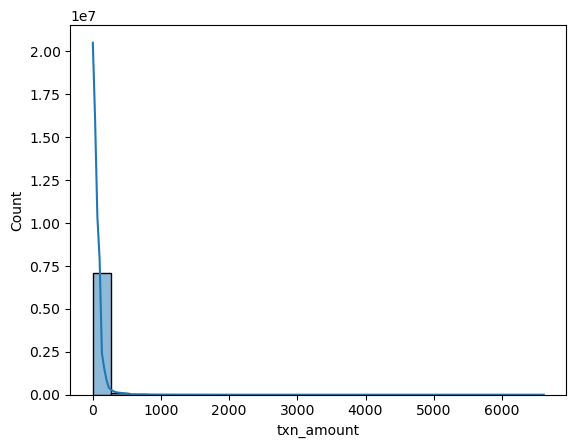

In [18]:
# Extreme Value Check
plot = sns.histplot(df_credit['txn_amount'], bins=25, kde=True)
plt.show()

In [19]:
# Check Average Transaction Amount
df_credit['txn_amount'].mean()

62.2157774159555

In [20]:
# Check Median Transaction Amount
df_credit['txn_amount'].median()

41.2

In [21]:
# Check Max Transaction Amount
df_credit['txn_amount'].max()

6613.44

# 05. Regression Analysis

## Credit Limit vs TXN Amount

### Data Prep Regression of Credit Limit vs TXN Amount

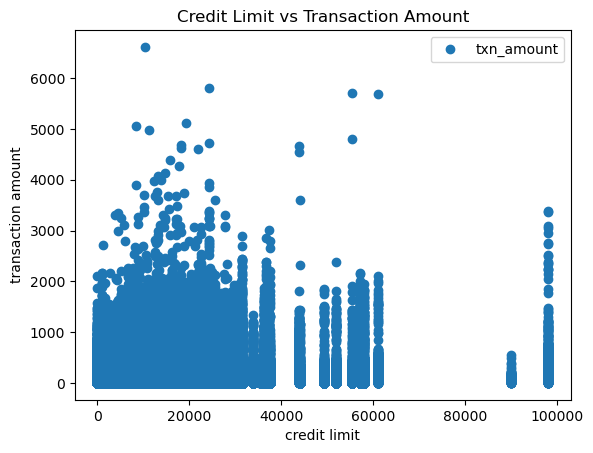

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_credit.plot(x = 'credit_limit', y='txn_amount',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Credit Limit vs Transaction Amount')  
plt.xlabel('credit limit')  
plt.ylabel('transaction amount')  
plt.show()

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_credit['credit_limit'].values.reshape(-1,1)
y = df_credit['txn_amount'].values.reshape(-1,1)

In [24]:
X

array([[12400.],
       [12400.],
       [12400.],
       ...,
       [14400.],
       [14400.],
       [14400.]])

In [25]:
y

array([[130.23],
       [ 73.61],
       [127.26],
       ...,
       [ 59.15],
       [ 43.12],
       [ 45.13]])

In [26]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Credit Limit vs TXN Amount Regression Analysis

In [27]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [28]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X.
y_pred_train = regression.predict(X_train)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(y_pred_train.shape)

(5088132, 1)
(5088132, 1)
(5088132, 1)


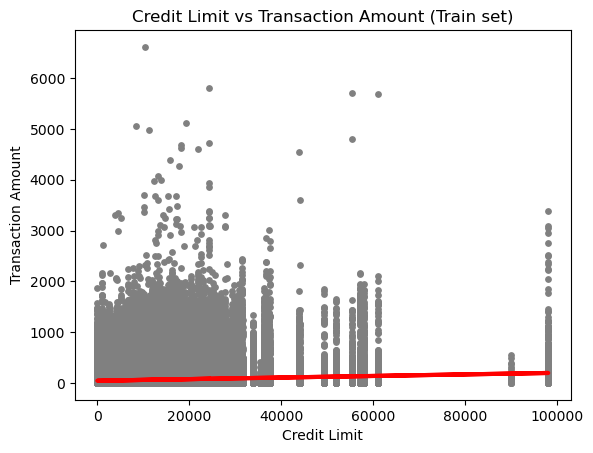

In [31]:
# Create a plot that shows the regression line from the model on the train set.

plot_train = plt
plot_train.scatter(X_train, y_train, color='gray', s = 15)
plot_train.plot(X_train, y_pred_train, color='red', linewidth =3)
plot_train.title('Credit Limit vs Transaction Amount (Train set)')
plot_train.xlabel('Credit Limit')
plot_train.ylabel('Transaction Amount')
plot_train.show()

In [32]:
# Create objects that contain the model summary statistics.

mse = mean_squared_error(y_train, y_pred_train) # This is the mean squared error
r2_1a = r2_score(y_train, y_pred_train) # This is the R2 score. 

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' , regression.coef_)
print('Mean squared error: ', mse)
print('R2 score: ', r2_1a)

Slope: [[0.00154977]]
Mean squared error:  7606.035876602545
R2 score:  0.014640330212004171


In [34]:
y_pred_train

array([[81.59588177],
       [59.74407316],
       [71.83230771],
       ...,
       [81.59588177],
       [60.36398262],
       [49.20561226]])

In [35]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_pred_train.flatten()})
data.head(30)

,Actual,Predicted
0,160.00,81.595882
1,62.48,59.744073
2,87.53,71.832308
3,123.57,89.189773
4,20.00,53.699956
5,94.00,51.995205
6,8.23,66.873032
7,43.63,56.179594
8,187.00,82.370769
9,14.41,62.223711


### Compare how the Credit Limit vs TXN Amount regression fits training set

In [36]:
# Predict Test
y_pred_test = regression.predict(X_test) 

In [37]:
print(X_test.shape)
print(y_test.shape)
print(y_pred_test.shape)

(2180628, 1)
(2180628, 1)
(2180628, 1)


In [38]:
rmse = mean_squared_error(y_test, y_pred_test)
r2_1b = r2_score(y_test, y_pred_test)

In [39]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2_1b)

Slope: [[0.00154977]]
Mean squared error:  7552.97676328944
R2 score:  0.014408003739096897


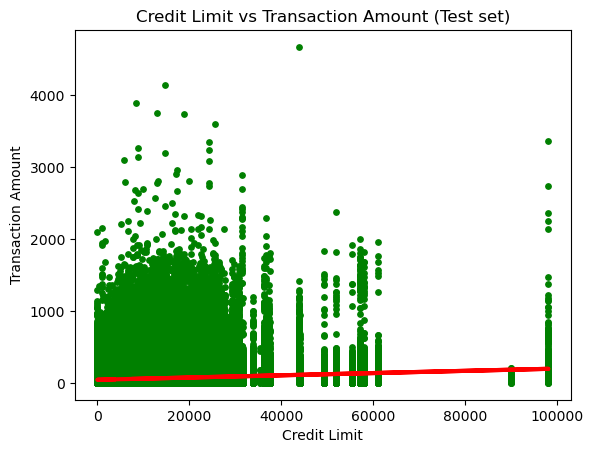

In [40]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_pred_test, color='red', linewidth =3)
plot_test.title('Credit Limit vs Transaction Amount (Test set)')
plot_test.xlabel('Credit Limit')
plot_test.ylabel('Transaction Amount')
plot_test.show()

In [41]:
# The modelis stable and not overfitting or underfitting because the train and test are almost identical. 
# The model is weak because the R2 is close to 0.
# This mean that credit limit alone does not predict transaction amount.

## FICO Score vs TXN Amount > 1000

### Data Prep Regression of FICO Score vs TXN Amount > 1000

In [42]:
(df_credit['txn_amount'] > 1000).sum()


8299

In [43]:
# Filter the data first
df_over_1000 = df_credit[df_credit['txn_amount'] > 1000]

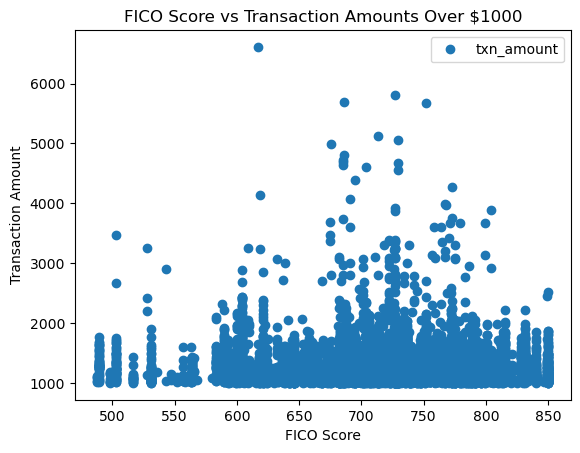

In [44]:
# Then plot only those rows
df_over_1000.plot(x='FICO_score', y='txn_amount', style='o')
plt.title('FICO Score vs Transaction Amounts Over $1000')
plt.xlabel('FICO Score')
plt.ylabel('Transaction Amount')
plt.show()

In [45]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_over_1000['FICO_score'].values.reshape(-1,1)
y = df_over_1000['txn_amount'].values.reshape(-1,1)

In [46]:
X

array([[787],
       [787],
       [787],
       ...,
       [673],
       [673],
       [673]], dtype=int64)

In [47]:
y

array([[1015.75],
       [1366.88],
       [1243.26],
       ...,
       [1038.2 ],
       [1005.38],
       [1201.  ]])

In [48]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis of FICO Score vs TXN Amount > 1000

In [49]:
# Create a regression object.
regression2 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [50]:
# Fit the regression object onto the training set.
regression2.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predict the values of y using X.
y_pred_train_2 = regression2.predict(X_train)

In [52]:
print(X_train.shape)
print(y_train.shape)
print(y_pred_train_2.shape)

(5809, 1)
(5809, 1)
(5809, 1)


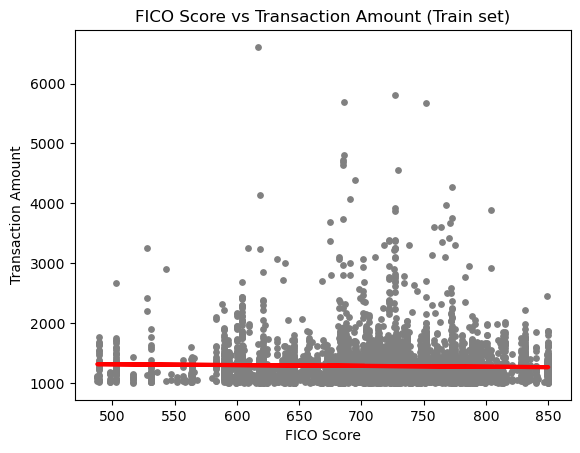

In [53]:
# Create a plot that shows the regression line from the model on the test set.

plot_train2 = plt
plot_train2.scatter(X_train, y_train, color='gray', s = 15)
plot_train2.plot(X_train, y_pred_train_2, color='red', linewidth =3)
plot_train2.title('FICO Score vs Transaction Amount (Train set)')
plot_train2.xlabel('FICO Score')
plot_train2.ylabel('Transaction Amount')
plot_train2.show()

In [54]:
# Create objects that contain the model summary statistics.

mse2 = mean_squared_error(y_train, y_pred_train_2) # This is the mean squared error
r2_2a = r2_score(y_train, y_pred_train_2) # This is the R2 score. 

In [55]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' , regression2.coef_)
print('Mean squared error: ', mse2)
print('R2 score: ', r2_2a)

Slope: [[-0.13675646]]
Mean squared error:  129286.33382050681
R2 score:  0.0006352172367917186


In [56]:
y_pred_train_2

array([[1284.23572013],
       [1313.22809009],
       [1277.53465348],
       ...,
       [1292.85137724],
       [1282.32112966],
       [1287.9281446 ]])

In [57]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_pred_train_2.flatten()})
data.head(30)

,Actual,Predicted
0,1561.20,1284.235720
1,1129.63,1313.228090
2,1041.29,1277.534653
3,1111.20,1280.953565
4,1114.23,1263.859007
5,1406.96,1278.902218
6,1299.15,1292.441108
7,1190.11,1289.158953
8,1099.65,1277.397897
9,1059.20,1279.312487


### Compare how the regression fits the training set of FICO Score vs TXN Amount > 1000

In [58]:
# Predict Test
y_pred_test_2 = regression2.predict(X_test)

In [59]:
print(X_test.shape)
print(y_test.shape)
print(y_pred_test_2.shape)

(2490, 1)
(2490, 1)
(2490, 1)


In [60]:
rmse2 = mean_squared_error(y_test, y_pred_test_2)
r2_2b = r2_score(y_test, y_pred_test_2)

In [61]:
print('Slope:' , regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2_2b)

Slope: [[-0.13675646]]
Mean squared error:  114040.18473724856
R2 score:  -0.0016619045506212071


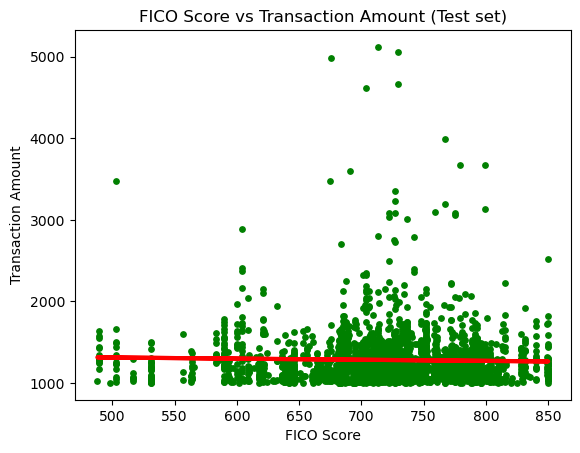

In [62]:
# Visualizing the training set results.
plot_test2 = plt
plot_test2.scatter(X_test, y_test, color='green', s = 15)
plot_test2.plot(X_test, y_pred_test_2, color='red', linewidth =3)
plot_test2.title('FICO Score vs Transaction Amount (Test set)')
plot_test2.xlabel('FICO Score')
plot_test2.ylabel('Transaction Amount')
plot_test2.show()

In [63]:
# This model is stable but not predictive.
# The negative slope is basically negligable implying that FICO score doesn't correspond to higher or lower spending.
# Model has basically 0 variance in the transaction amounts over 1000.
# Basically FICO score doesnt help us predict the size of the high value transactions.

# 06. Extra

In [64]:
# This extra section will be with less than 5k entries as it is at a user level and we only have 2k users in the data set.

## User data prep

In [65]:
df_user = (df.groupby('user_id').agg({
          'txn_amount': 'mean',   
          'credit_limit': 'mean',    
          'yearly_income_person': 'mean'})
      .reset_index()
      .rename(columns={'txn_amount': 'avg_txn_amount'}))

In [66]:
# View the new user df
print(df_user.shape)
df_user.head()

(2000, 4)


,user_id,avg_txn_amount,credit_limit,yearly_income_person
0,0,88.623709,23326.601098,59696.0
1,1,93.825216,10639.727155,77254.0
2,2,37.881863,26493.458225,33483.0
3,3,134.317836,92110.171757,249925.0
4,4,102.509175,34900.000000,109687.0


In [67]:
df_user['user_id'].nunique()

2000

## Credit Limit vs Avg TXN Amount

### Data Prep Regression of Credit Limit vs Avg TXN Amount of each user

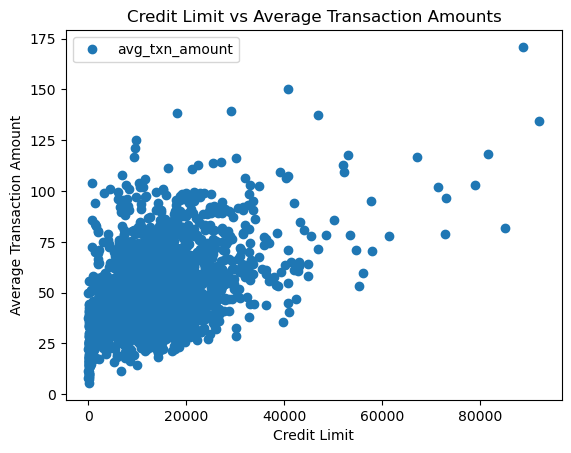

In [67]:
# Then plot only those rows
df_user.plot(x='credit_limit', y='avg_txn_amount', style='o')
plt.title('Credit Limit vs Average Transaction Amounts')
plt.xlabel('Credit Limit')
plt.ylabel('Average Transaction Amount')
plt.show()

In [68]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_user['credit_limit'].values.reshape(-1,1)
y = df_user['avg_txn_amount'].values.reshape(-1,1)

In [69]:
X

array([[23326.60109771],
       [10639.72715527],
       [26493.4582254 ],
       ...,
       [ 8123.79714649],
       [ 9200.        ],
       [14647.10254735]])

In [70]:
y

array([[88.6237089 ],
       [93.82521611],
       [37.88186321],
       ...,
       [35.6036201 ],
       [68.31204089],
       [65.99914435]])

In [71]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 1)
(600, 1)
(1400, 1)
(600, 1)


### Regression Analysis Credit Limit vs Avg TXN Amount

In [73]:
# Create a regression object.
regression3 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [74]:
# Fit the regression object onto the training set.
regression3.fit(X_train, y_train)

LinearRegression()

In [75]:
# Predict the values of y using X.
y_pred_train_3 = regression3.predict(X_train)

In [76]:
print(y_pred_train_3.shape)

(1400, 1)


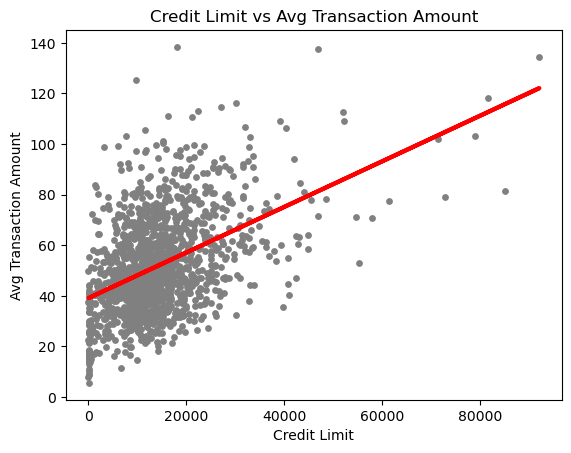

In [77]:
# Create a plot that shows the regression line from the model on the test set.

plot_train3 = plt
plot_train3.scatter(X_train, y_train, color='gray', s = 15)
plot_train3.plot(X_train, y_pred_train_3, color='red', linewidth =3)
plot_train3.title('Credit Limit vs Avg Transaction Amount')
plot_train3.xlabel('Credit Limit')
plot_train3.ylabel('Avg Transaction Amount')
plot_train3.show()

In [78]:
# Create objects that contain the model summary statistics.

mse3 = mean_squared_error(y_train, y_pred_train_3) # This is the mean squared error
r2_3a = r2_score(y_train, y_pred_train_3) # This is the R2 score. 

In [79]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression3.coef_)
print('Mean squared error: ', mse3)
print('R2 score: ', r2_3a)

Slope: [[0.00090108]]
Mean squared error:  293.2240534490099
R2 score:  0.20995306194086427


In [80]:
y_pred_train_3

array([[43.47014435],
       [52.64957321],
       [60.98446759],
       ...,
       [48.38072932],
       [46.36428131],
       [54.26913397]])

In [81]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_pred_train_3.flatten()})
data.head(30)

,Actual,Predicted
0,35.031145,43.470144
1,52.578879,52.649573
2,88.471332,60.984468
3,33.574831,53.532534
4,101.241666,52.787915
5,55.723529,43.467130
6,83.201007,61.485504
7,62.227500,54.997617
8,68.758240,57.804972
9,51.144896,49.663375


### Compare how the regression fits the training set Credit Limit vs Avg TXN Amount

In [82]:
# Predict Test
y_pred_test_3 = regression3.predict(X_test) 

In [83]:
rmse3 = mean_squared_error(y_test, y_pred_test_3)
r2_3b = r2_score(y_test, y_pred_test_3)

In [84]:
print('Slope:' ,regression3.coef_)
print('Mean squared error: ', rmse3)
print('R2 score: ', r2_3b)

Slope: [[0.00090108]]
Mean squared error:  340.17477794156696
R2 score:  0.16566153263200445


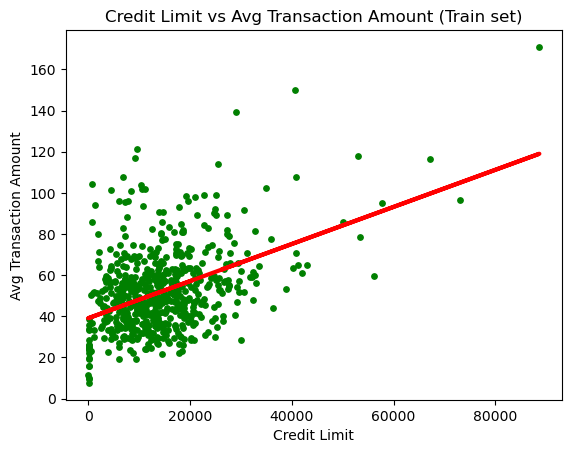

In [85]:
# Visualizing the training set results.
plot_test3 = plt
plot_test3.scatter(X_test, y_test, color='green', s = 15)
plot_test3.plot(X_test, y_pred_test_3, color='red', linewidth =3)
plot_test3.title('Credit Limit vs Avg Transaction Amount (Train set)')
plot_test3.xlabel('Credit Limit')
plot_test3.ylabel('Avg Transaction Amount')
plot_test3.show()

In [86]:
# We can see a positive relationship between credit limit and the average transaction but it is weak.
# The model does seem to generalize reasonably well
# The R2 is also weak but higher than it was with all transactions

## Yearly Income vs Avg TXN Amount

### Data Prep Regression of Yearly Income Person vs Avg TXN Amount of each user

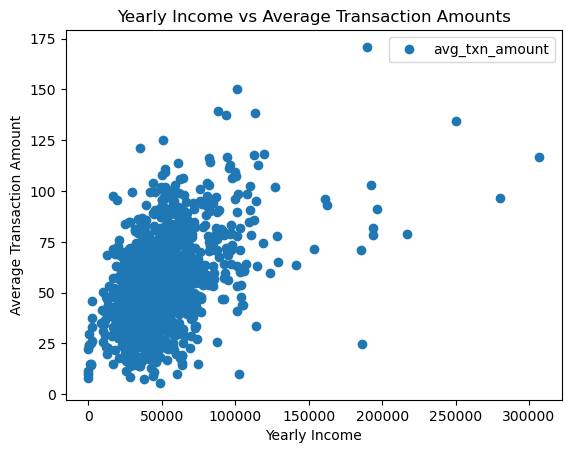

In [87]:
# Then plot only those rows
df_user.plot(x='yearly_income_person', y='avg_txn_amount', style='o')
plt.title('Yearly Income vs Average Transaction Amounts')
plt.xlabel('Yearly Income')
plt.ylabel('Average Transaction Amount')
plt.show()

In [88]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_user['yearly_income_person'].values.reshape(-1,1)
y = df_user['avg_txn_amount'].values.reshape(-1,1)

In [89]:
X

array([[59696.],
       [77254.],
       [33483.],
       ...,
       [30942.],
       [54654.],
       [65909.]])

In [90]:
y

array([[88.6237089 ],
       [93.82521611],
       [37.88186321],
       ...,
       [35.6036201 ],
       [68.31204089],
       [65.99914435]])

In [91]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis Credit Limit vs Avg TXN Amount

In [92]:
# Create a regression object.
regression4 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [93]:
# Fit the regression object onto the training set.
regression4.fit(X_train, y_train)

LinearRegression()

In [96]:
# Predict the values of y using X.
y_pred_train_4 = regression4.predict(X_train)

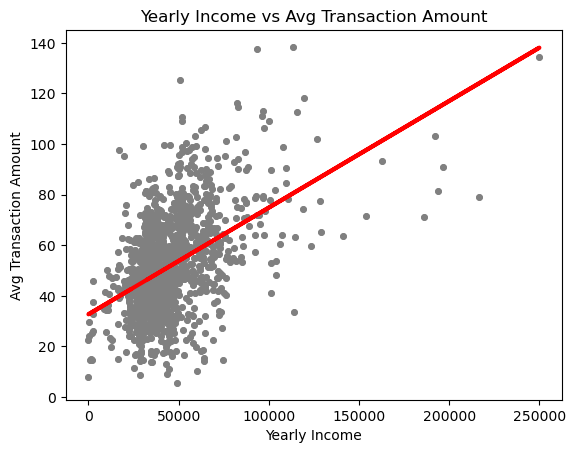

In [97]:
# Create a plot that shows the regression line from the model on the test set.

plot_train4 = plt
plot_train4.scatter(X_train, y_train, color='gray', s = 15)
plot_train4.plot(X_train, y_pred_train_4, color='red', linewidth =3)
plot_train4.title('Yearly Income vs Avg Transaction Amount')
plot_train4.xlabel('Yearly Income')
plot_train4.ylabel('Avg Transaction Amount')
plot_train4.show()

In [98]:
# Create objects that contain the model summary statistics.

mse4 = mean_squared_error(y_train, y_pred_train_4) # This is the mean squared error
r2_4a = r2_score(y_train, y_pred_train_4) # This is the R2 score. 

In [99]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression4.coef_)
print('Mean squared error: ', mse4)
print('R2 score: ', r2_4a)

Slope: [[0.00042168]]
Mean squared error:  289.4361174237863
R2 score:  0.22015907070137064


In [100]:
y_pred_train_4

array([[46.72841263],
       [49.10080326],
       [56.32255265],
       ...,
       [57.46236279],
       [53.56010489],
       [42.36483312]])

In [101]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_pred_train_4.flatten()})
data.head(30)

,Actual,Predicted
0,35.031145,46.728413
1,52.578879,49.100803
2,88.471332,56.322553
3,33.574831,48.240991
4,101.241666,64.864171
5,55.723529,47.182987
6,83.201007,57.715794
7,62.227500,65.580189
8,68.758240,59.550539
9,51.144896,49.093213


### Compare how the regression fits the training set Yearly Income vs Avg TXN Amount

In [102]:
# Predict test
y_pred_test_4 = regression4.predict(X_test) 

In [103]:
rmse4 = mean_squared_error(y_test, y_pred_test_4)
r2_4b = r2_score(y_test, y_pred_test_4)

In [104]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse4)
print('R2 score: ', r2_4b)

Slope: [[0.00154977]]
Mean squared error:  318.8313227275723
R2 score:  0.2180101100877988


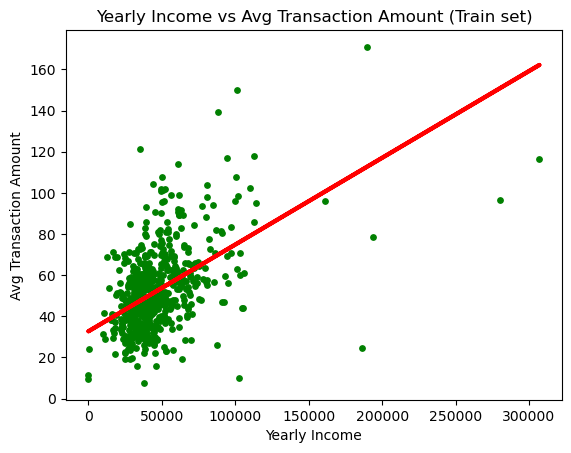

In [105]:
# Visualizing the training set results.
plot_test4 = plt
plot_test4.scatter(X_test, y_test, color='green', s = 15)
plot_test4.plot(X_test, y_pred_test_4, color='red', linewidth =3)
plot_test4.title('Yearly Income vs Avg Transaction Amount (Train set)')
plot_test4.xlabel('Yearly Income')
plot_test4.ylabel('Avg Transaction Amount')
plot_test4.show()

In [106]:
# There is an increase in spend when the income increases but very small. 
# The model is generally consistant.
# The model does explain some of the variation in average transaction amounts
# This model does have some predictive power, slightly stronger than your credit limit regression.
# There are likely other important drivers beyond just the income.

## Yearly Income + Credit Limit vs Avg Transaction Amount

### Data Prep Regression Yrly Incm + Crdt Lmt vs Avg Txn Amount

In [107]:
# Features (independent variables)
X = df_user[['yearly_income_person', 'credit_limit']]

# Target (dependent variable)
y = df_user['avg_txn_amount']

In [108]:
X

,yearly_income_person,credit_limit
0,59696.0,23326.601098
1,77254.0,10639.727155
2,33483.0,26493.458225
3,249925.0,92110.171757
4,109687.0,34900.000000
...,...,...
1995,48010.0,17456.265259
1996,49378.0,9091.855819
1997,30942.0,8123.797146
1998,54654.0,9200.000000


In [109]:
y

0        88.623709
1        93.825216
2        37.881863
3       134.317836
4       102.509175
           ...    
1995     31.153818
1996     46.986274
1997     35.603620
1998     68.312041
1999     65.999144
Name: avg_txn_amount, Length: 2000, dtype: float64

In [110]:
print(X.shape)
print(y.shape)

(2000, 2)
(2000,)


In [111]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis Yrly Incm + Crdt Lmt vs Avg Txn Amount

In [112]:
# Create a regression object.
regression5 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [113]:
# Fit the regression object onto the training set.
regression5.fit(X_train, y_train)

LinearRegression()

In [114]:
# Predict the values of y using X.
y_pred_train_5 = regression5.predict(X_train)

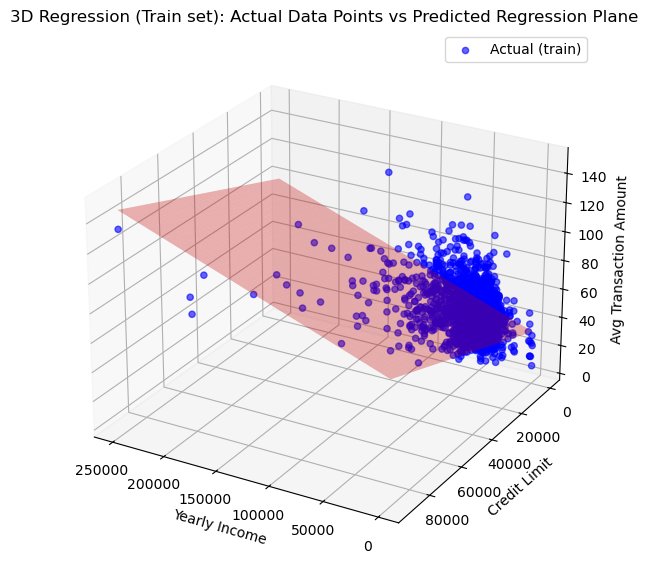

In [115]:
# --- Create regression plane ---
income_range = np.linspace(X_train['yearly_income_person'].min(), X_train['yearly_income_person'].max(), 30)
credit_range = np.linspace(X_train['credit_limit'].min(), X_train['credit_limit'].max(), 30)
income_grid, credit_grid = np.meshgrid(income_range, credit_range)

plane = (regression5.intercept_ +
         regression5.coef_[0] * income_grid +
         regression5.coef_[1] * credit_grid)

# --- 3D Plot ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Actual training data points
ax.scatter(X_train['yearly_income_person'], X_train['credit_limit'], y_train,
           color='blue', alpha=0.6, label='Actual (train)')

# Regression plane
ax.plot_surface(income_grid, credit_grid, plane, color='red', alpha=0.3, rstride=1, cstride=1, linewidth=0)

# Labels and title
ax.set_xlabel('Yearly Income')
ax.set_ylabel('Credit Limit')
ax.set_zlabel('Avg Transaction Amount')
plt.title('3D Regression (Train set): Actual Data Points vs Predicted Regression Plane')

# Legend and viewing angle
ax.legend()
ax.view_init(elev=25, azim=120)

plt.show()

In [117]:
# Create objects that contain the model summary statistics.

mse5 = mean_squared_error(y_train, y_pred_train_5) # This is the mean squared error
r2_5a = r2_score(y_train, y_pred_train_5) # This is the R2 score. 

In [118]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression5.coef_)
print('Mean squared error: ', mse5)
print('R2 score: ', r2_5a)

Slope: [0.00026667 0.00052164]
Mean squared error:  274.3640417772583
R2 score:  0.26076845139396043


In [119]:
y_pred_train_5

array([43.77428046, 50.58855452, 59.98059953, ..., 53.40505345,
       49.76998471, 47.26637911])

In [120]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({
    'Actual': y_train.to_numpy().flatten(),
    'Predicted': y_pred_train_5.flatten()})

print(data.head(30))

        Actual  Predicted
0    35.031145  43.774280
1    52.578879  50.588555
2    88.471332  59.980600
3    33.574831  50.555969
4   101.241666  60.637201
5    55.723529  44.060003
6    83.201007  61.151720
7    62.227500  62.369207
8    68.758240  60.181317
9    51.144896  48.855034
10   51.177057  44.693159
11   84.546735  84.140466
12   37.761269  50.044455
13   42.874588  51.022568
14   61.475544  58.742647
15   45.290366  44.016093
16   40.300487  42.951370
17   39.286171  46.945714
18   69.062675  46.739218
19   74.125509  44.874321
20   61.226514  59.207631
21   47.811932  39.423664
22   47.001316  51.812140
23   32.164484  43.899905
24   63.787923  56.262470
25   97.196565  51.931724
26   65.990665  46.125688
27   45.235448  42.457692
28   67.321818  53.314770
29   41.377949  37.037550


### Compare how the regression fits the training set Yrly Incm + Crdt Lmt vs Avg Txn Amount

In [121]:
# Predict Test
y_pred_test_5 = regression5.predict(X_test)

In [122]:
rmse5 = mean_squared_error(y_test, y_pred_test_5)
r2_5b = r2_score(y_test, y_pred_test_5)

In [123]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse5)
print('R2 score: ', r2_5b)

Slope: [[0.00154977]]
Mean squared error:  309.610341476356
R2 score:  0.24062618824421744


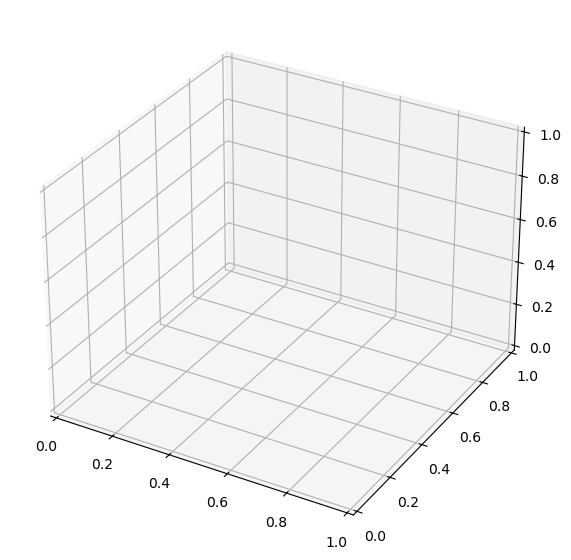

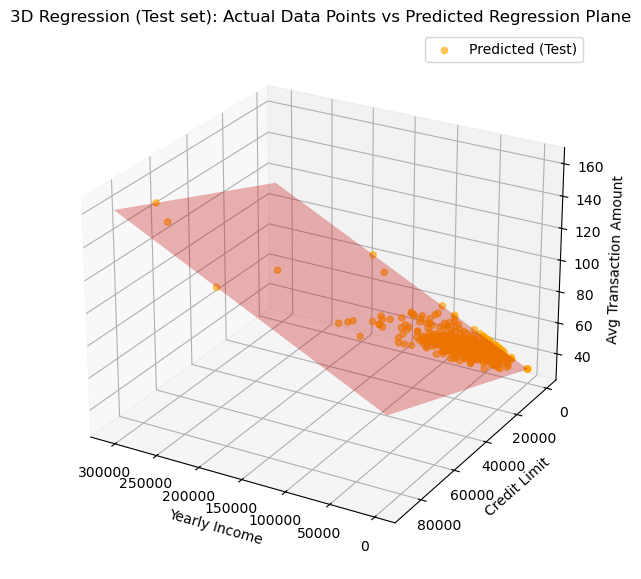

In [125]:
# --- Create regression plane ---
income_range = np.linspace(X_test['yearly_income_person'].min(), X_test['yearly_income_person'].max(), 30)
credit_range = np.linspace(X_test['credit_limit'].min(), X_test['credit_limit'].max(), 30)
income_grid, credit_grid = np.meshgrid(income_range, credit_range)

plane = (regression5.intercept_ +
         regression5.coef_[0] * income_grid +
         regression5.coef_[1] * credit_grid)

# --- 3D Plot ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Predicted training data points
ax.scatter(X_test['yearly_income_person'], X_test['credit_limit'], y_pred_test_5,
           color='orange', alpha=0.6, label='Predicted (Test)')

# Regression plane
ax.plot_surface(income_grid, credit_grid, plane, color='red', alpha=0.3, rstride=1, cstride=1, linewidth=0)

# Labels and title
ax.set_xlabel('Yearly Income')
ax.set_ylabel('Credit Limit')
ax.set_zlabel('Avg Transaction Amount')
plt.title('3D Regression (Test set): Actual Data Points vs Predicted Regression Plane')

# Legend and viewing angle
ax.legend()
ax.view_init(elev=25, azim=120)

plt.show()

## Yrly Income + Transaction Yr vs Transaction Amount

### Data Prep Yrly Income + Transaction Yr vs Transaction Amount

In [126]:
# Select your predictors and target
X = df_credit[['yearly_income_person', 'txn_year']]
y = df_credit['txn_amount']

In [127]:
X

,yearly_income_person,txn_year
10546,59696.0,2003
10547,59696.0,2003
10548,59696.0,2003
10549,59696.0,2003
10550,59696.0,2003
...,...,...
24386827,65909.0,2020
24386829,65909.0,2020
24386830,65909.0,2020
24386831,65909.0,2020


In [128]:
y

10546       130.23
10547        73.61
10548       127.26
10549        40.52
10550       142.91
             ...  
24386827     63.43
24386829     54.00
24386830     59.15
24386831     43.12
24386832     45.13
Name: txn_amount, Length: 7268760, dtype: float64

In [129]:
print(X.shape)
print(y.shape)

(7268760, 2)
(7268760,)


In [130]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis Yrly Incm + Transaction Year vs Txn Amount

In [131]:
# Create a regression object.
regression6 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [132]:
# Fit the regression object onto the training set.
regression6.fit(X_train, y_train)

LinearRegression()

In [133]:
# Predict the values of y using X.
y_pred_train_6 = regression6.predict(X_train)

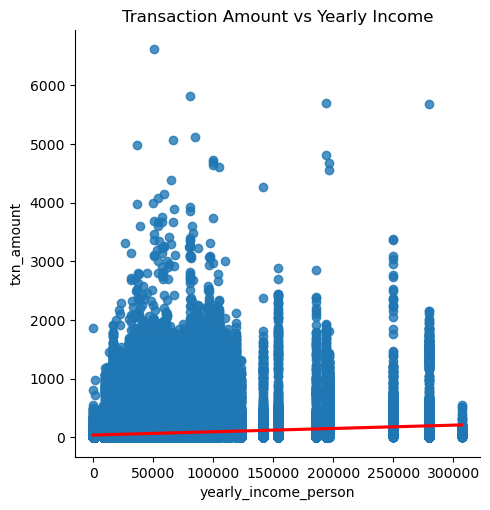

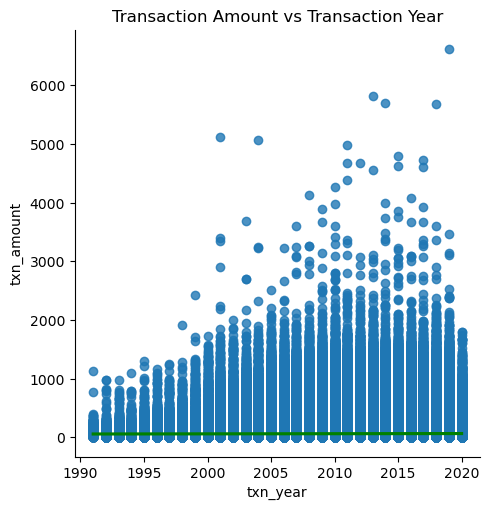

In [134]:
# Yearly income vs transaction amount
sns.lmplot(x='yearly_income_person', y='txn_amount', data=df_credit, line_kws={'color':'red'})
plt.title('Transaction Amount vs Yearly Income')
plt.show()

# Transaction year vs transaction amount
sns.lmplot(x='txn_year', y='txn_amount', data=df_credit, line_kws={'color':'green'})
plt.title('Transaction Amount vs Transaction Year')
plt.show()


In [135]:
# Many people across all income levels seem to have similar transaction behaviors, meaning income alone doesn't explain transaction well.
# But we can notice that there are more high spenders in higher income ranges because the spread in transaction amount increases.
# Knowing that I decided to plot a second point that might help explain the transaction on a yearly basis instead of on a user level.
# This shows spending increase over time in both amount and number of transactions.
# This regression might look flat the numeric difference between years is small compared to the scale of transaction amounts and/or 
# the distribution points are dense.
# The simple linear regression seems to underestimate the visible pattern.

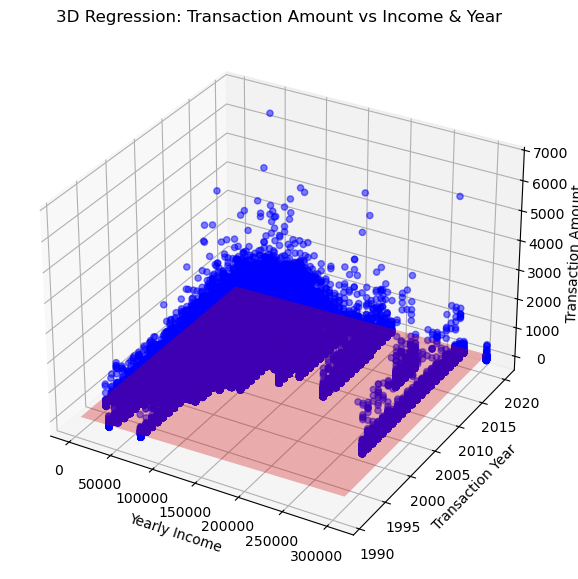

In [136]:
# Create a meshgrid for the plane
income_range = np.linspace(X_train['yearly_income_person'].min(), X_train['yearly_income_person'].max(), 20)
year_range = np.linspace(X_train['txn_year'].min(), X_train['txn_year'].max(), 20)
income_grid, year_grid = np.meshgrid(income_range, year_range)
plane = regression6.intercept_ + regression6.coef_[0]*income_grid + regression6.coef_[1]*year_grid

# 3D plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['yearly_income_person'], X_train['txn_year'], y_train, color='blue', alpha=0.5, label='Data points')
ax.plot_surface(income_grid, year_grid, plane, color='red', alpha=0.3)
ax.set_xlabel('Yearly Income')
ax.set_ylabel('Transaction Year')
ax.set_zlabel('Transaction Amount')
plt.title('3D Regression: Transaction Amount vs Income & Year')
plt.show()


In [137]:
# Create objects that contain the model summary statistics.

mse6 = mean_squared_error(y_train, y_pred_train_6) # This is the mean squared error
r2_6a = r2_score(y_train, y_pred_train_6) # This is the R2 score. 

In [138]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression6.coef_)
print('Mean squared error: ', mse6)
print('R2 score: ', r2_6a)

Slope: [0.00056154 0.18291316]
Mean squared error:  7551.30830078052
R2 score:  0.02173027126870819


In [139]:
y_pred_train_6

array([93.49248314, 61.45875075, 74.73602198, ..., 93.85830946,
       56.28315633, 53.53299983])

In [140]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({
    'Actual': y_train.to_numpy().flatten(),
    'Predicted': y_pred_train_6.flatten()})

print(data.head(30))

    Actual   Predicted
0   160.00   93.492483
1    62.48   61.458751
2    87.53   74.736022
3   123.57   83.905203
4    20.00   49.878798
5    94.00   79.335841
6     8.23   70.705819
7    43.63   55.679832
8   187.00   84.487751
9    14.41   54.581840
10   94.86  115.216465
11   80.80   65.978252
12   39.88   56.606272
13   27.56   52.523567
14   21.92   71.565372
15   64.73   50.812408
16  121.35   89.280573
17   36.48   51.670753
18   59.74   54.108247
19   22.29   59.947350
20   78.27   52.509826
21    1.12   63.356390
22   11.15   65.541292
23  152.75   73.702046
24   13.64   66.830635
25   41.65   52.897999
26   52.79   54.178473
27  208.00   64.699065
28   43.08   51.307998
29    8.44   52.348449


### Compare how the regression fits the training set Transaction Year vs Avg Transaction Numbers

In [142]:
# Predict.
y_pred_test_6 = regression6.predict(X_test) # This is predicting X_train!

In [144]:
rmse6 = mean_squared_error(y_test, y_pred_test_6)
r2_6b = r2_score(y_test, y_pred_test_6)

In [145]:
print('Slope:' ,regression6.coef_)
print('Mean squared error: ', rmse6)
print('R2 score: ', r2_6b)

Slope: [0.00056154 0.18291316]
Mean squared error:  7497.889691238618
R2 score:  0.021596345370786474


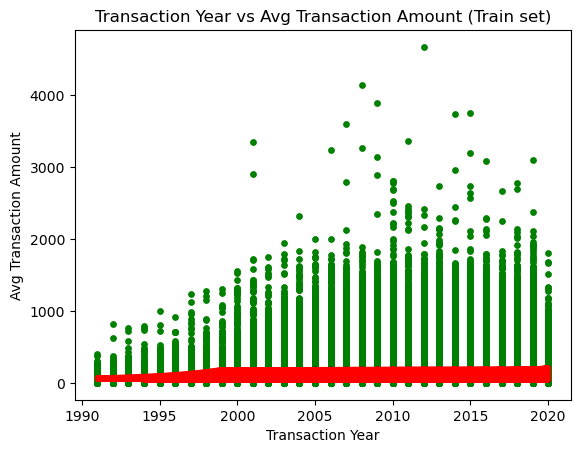

In [146]:
# Increase Agg path chunksize to handle large datasets
matplotlib.rcParams['agg.path.chunksize'] = 10000  # increase if still too heavy

# Plot the training set
plt.scatter(X_test['txn_year'], y_test, color='green', s=15)
plt.plot(X_test['txn_year'], y_pred_test_6, color='red', linewidth=3)
plt.title('Transaction Year vs Avg Transaction Amount (Train set)')
plt.xlabel('Transaction Year')
plt.ylabel('Avg Transaction Amount')
plt.show()


## Transaction Yr vs Avg Transaction Amount

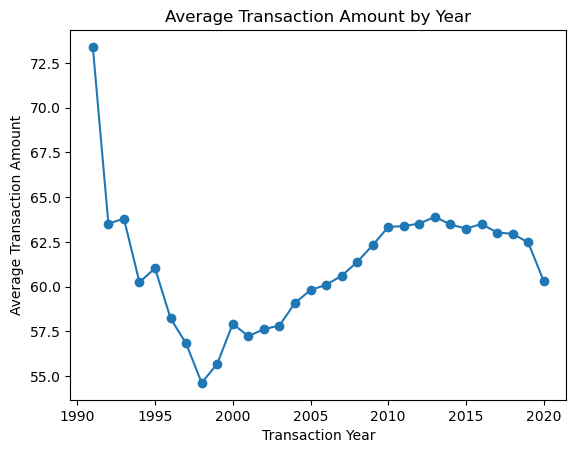

In [147]:
df_yearly = df_credit.groupby('txn_year')['txn_amount'].mean().reset_index()

plt.plot(df_yearly['txn_year'], df_yearly['txn_amount'], marker='o')
plt.title('Average Transaction Amount by Year')
plt.xlabel('Transaction Year')
plt.ylabel('Average Transaction Amount')
plt.show()


In [148]:
# 1991 - 1998 Average transaction amount declines
# 1998 - 2013 Steadyincrease until reaching peak with an initial over correction to 2000.
# 2013 -2020 Steady decline to mid 2000's levels

# Export for Tableau

In [68]:
df_user.to_csv(os.path.join(path, '02_Data', 'Prepared Data', 'avg_txn_vs_yrly_incm.pkl'))